# This notebook deals with measuring the distribution of information throughout an image within the MNIST distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from mnist_preprocessing import *

%matplotlib inline


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
train, test = returnData()
size = train.shape[0]
n_train = train.shape[1]
n_test = test.shape[1]

----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000


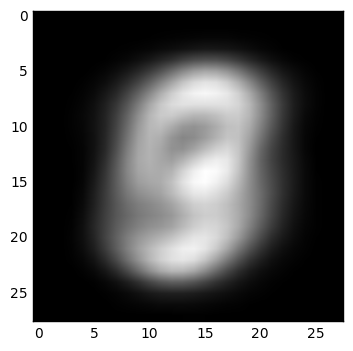

In [3]:
avg_image_vec = (np.mean(train, axis=1))
avg_image = unpackcw(avg_image_vec, 28, 28)
plt.imshow(avg_image,cmap='gray')
plt.savefig('avgImage.png', dpi=400)

In [4]:
meanOfColumns = np.zeros((55000, 28))
for i in range(n_train):
    for col in range(28):
        meanOfColumns[i, col] = np.mean(train[(28-col-1)*28:(28-col)*28, i])

In [5]:
meanColumns = np.zeros(28)
stdDevColumns = np.zeros(28)

for i in range(28):
    meanColumns[i] = np.mean(meanOfColumns[:, i])
    stdDevColumns[i] = np.std(meanOfColumns[:, i])

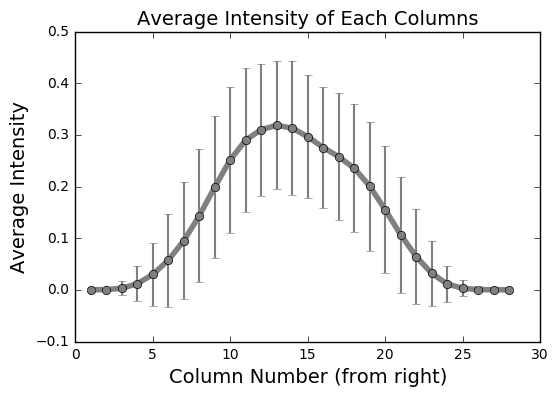

In [11]:
fig, ax = plt.subplots()
plt.figure(1)

numColsIdxs = np.arange(1,29)

plt.plot(numColsIdxs, meanColumns, '-o', c='gray', linewidth=4.0)
plt.errorbar(numColsIdxs, meanColumns, yerr=stdDevColumns, linestyle='', c='gray', linewidth=1.5)

plt.title("Average Intensity of Each Columns", fontsize=14)
plt.ylabel("Average Intensity", fontsize=14)
plt.xlabel("Column Number (from right)", fontsize=14)
plt.savefig('avgImage_col_histogram.png', dpi=400)

In [20]:
layerMaskVecs = np.zeros((14, 784))
idx = 0
for squareSide in np.arange(2, 30, 2):
    maskVecA = np.ones(784) - generateCenterSquareMask(squareSide)
    maskVecB = np.ones(784) - generateCenterSquareMask(squareSide - 2)
    maskVec = maskVecA - maskVecB
    layerMaskVecs[idx] = maskVec
    idx += 1


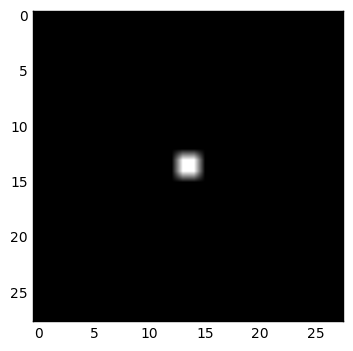

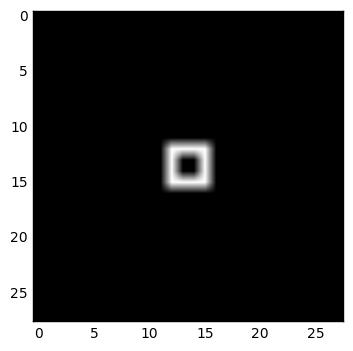

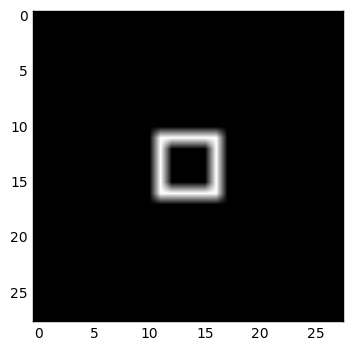

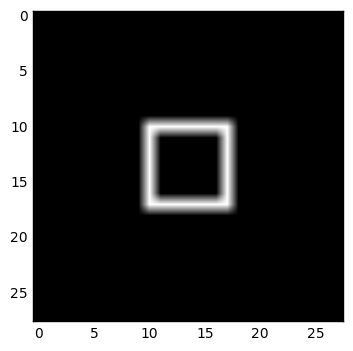

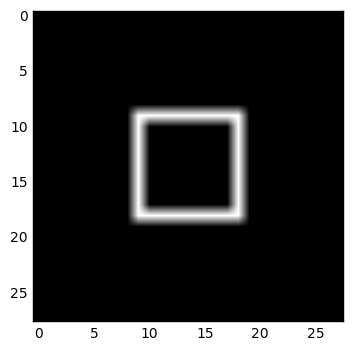

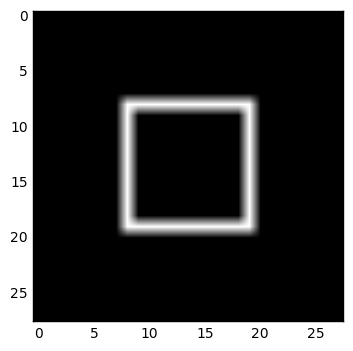

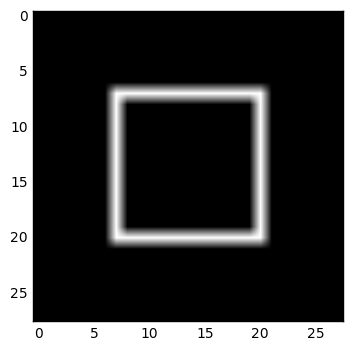

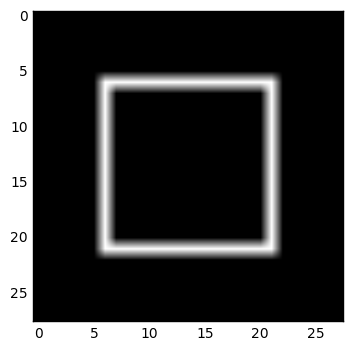

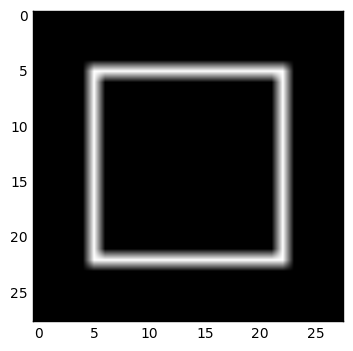

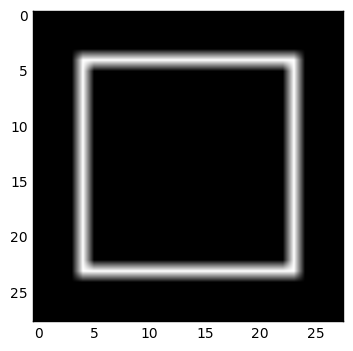

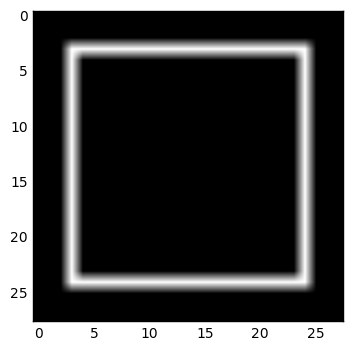

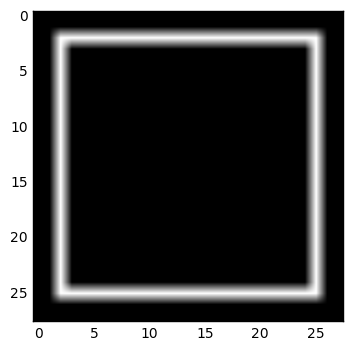

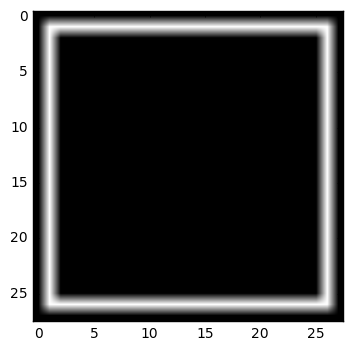

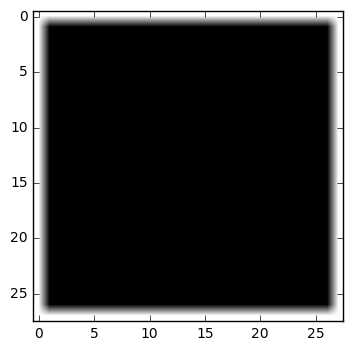

In [24]:
for i in range(14):
    plt.figure(i)
    plt.imshow(unpackcw(layerMaskVecs[i], 28, 28), cmap='gray')

In [37]:
meanOfLayers = np.zeros((55000, 14))
for i in range(55000):
    for layer in range(14):
        sumVisible = np.dot(train[:, i], layerMaskVecs[layer])
        meanOfLayers[i, layer] = sumVisible / np.sum(layerMaskVecs[layer])

In [39]:
meanLayers = np.zeros(14)
stdDevLayers = np.zeros(14)

for i in range(14):
    meanLayers[i] = np.mean(meanOfLayers[:, i])
    stdDevLayers[i] = np.std(meanOfLayers[:, i])

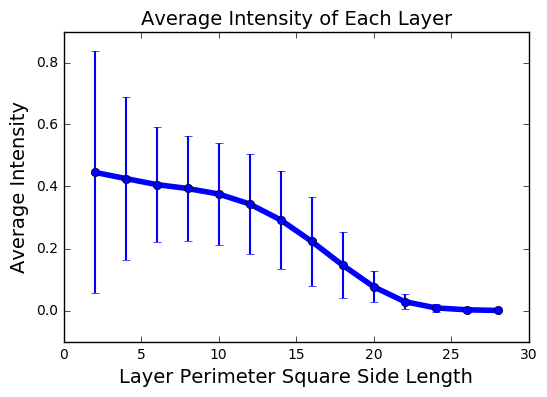

In [45]:
fig, ax = plt.subplots()
plt.figure(1)

layerIdxs = np.arange(2, 30, 2)

plt.plot(layerIdxs, meanLayers, '-o', c='b', linewidth=4.0)
plt.errorbar(layerIdxs, meanLayers, yerr=stdDevLayers, linestyle='', c='b', linewidth=1.5)

plt.title("Average Intensity of Each Layer", fontsize=14)
plt.ylabel("Average Intensity", fontsize=14)
plt.xlabel("Layer Perimeter Square Side Length", fontsize=14)
# plt.savefig('avgImage_col_histogram.png')